# Prediksi Nilai Siswa

## Import Data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

Kami menggunakan dataset sekunder yang bersumber dari kaggle.com dengan tautan sebagai berikut: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

In [ ]:
dataset = files.upload()

for fn in dataset.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(name = fn, length = len(dataset[fn])))

Saving student-mat.csv to student-mat (2).csv
Nama file "student-mat.csv" dengan panjang 41983 bytes


In [ ]:
data = pd.read_csv('student-mat.csv')

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.shape

(395, 33)

## Data Preparation, Preprocessing, dan Transformation

### Missing Value

In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
data.isnull().values.any()

False

### Cek data duplikat

In [ ]:
data.duplicated().sum()

0

### Cek Outlier

Sebelum mengatasi outlier

<Axes: >

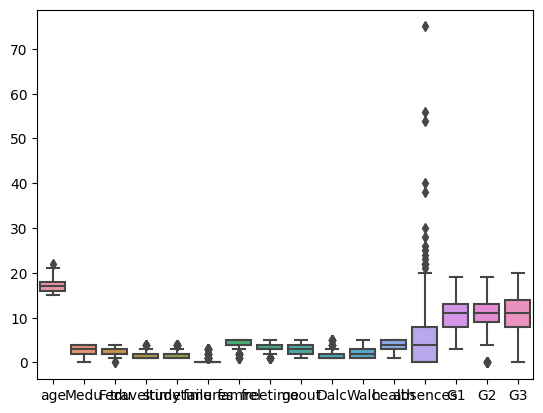

In [ ]:
import seaborn as sns

sns.boxplot(data=data)

Setelah mengatasi outlier

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = data[numeric_cols]

In [ ]:
df_numeric.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df_numeric))
threshold = 3
data = data[(z < threshold).all(axis=1)]

<Axes: >

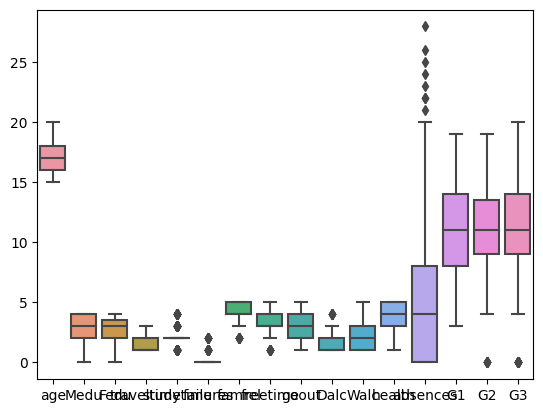

In [ ]:
sns.boxplot(data=data)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


### Cek fitur penting dengan menggunakan Random Forest

Rubah variabel kategorikal ke numerik dengan menggunakan one-hot encoding

In [ ]:
string_cols = data.select_dtypes(include=['object']).columns.tolist()
df_string = data[string_cols]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df = data.copy(deep = True)
list_columns = df_string.columns

for column in list_columns:
  df = pd.get_dummies(df, columns=[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                355 non-null    int64
 1   Medu               355 non-null    int64
 2   Fedu               355 non-null    int64
 3   traveltime         355 non-null    int64
 4   studytime          355 non-null    int64
 5   failures           355 non-null    int64
 6   famrel             355 non-null    int64
 7   freetime           355 non-null    int64
 8   goout              355 non-null    int64
 9   Dalc               355 non-null    int64
 10  Walc               355 non-null    int64
 11  health             355 non-null    int64
 12  absences           355 non-null    int64
 13  G1                 355 non-null    int64
 14  G2                 355 non-null    int64
 15  G3                 355 non-null    int64
 16  school_GP          355 non-null    uint8
 17  school_MS       

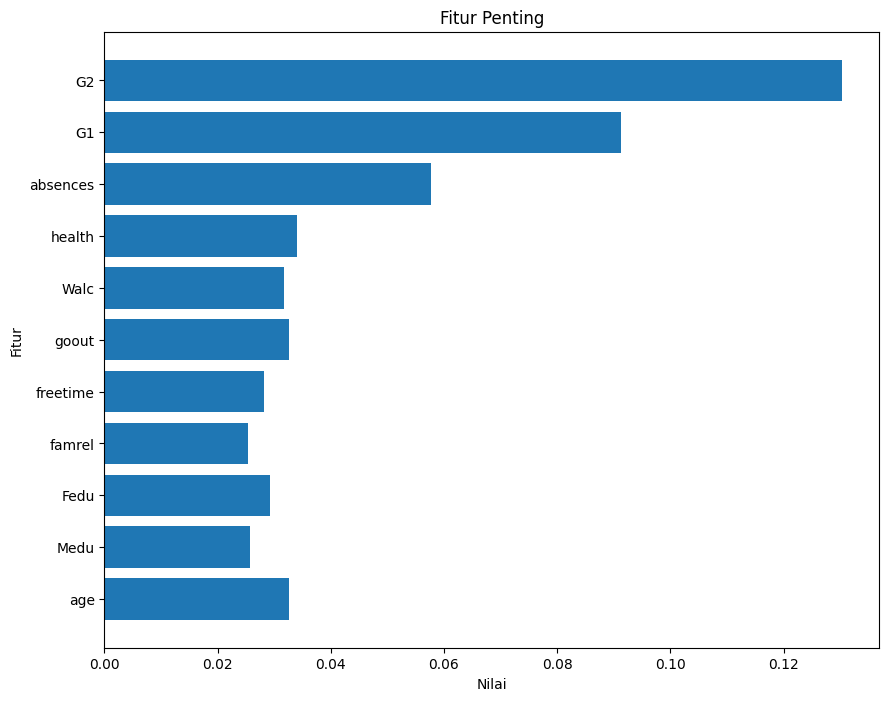

In [ ]:
import matplotlib.pyplot as plt

X = df.drop('G3', axis=1)
y = df['G3']

rfc = RandomForestClassifier()
rfc.fit(X, y)

importances = rfc.feature_importances_
important_cols = X.columns[importances > 0.025]
important_scores = importances[importances > 0.025]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(important_cols, important_scores)
ax.set_xlabel('Nilai')
ax.set_ylabel('Fitur')
ax.set_title('Fitur Penting')
plt.show()

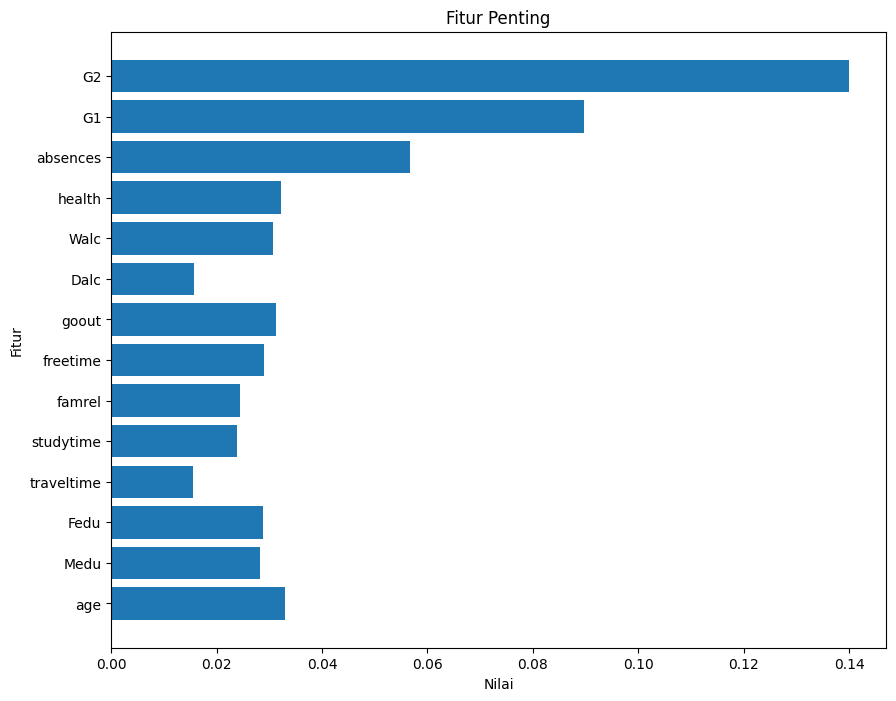

In [ ]:
import matplotlib.pyplot as plt

X = df.drop('G3', axis=1)
y = df['G3']

rfc = RandomForestClassifier()
rfc.fit(X, y)

importances = rfc.feature_importances_
important_cols = X.columns[importances > 0.015]
important_scores = importances[importances > 0.015]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(important_cols, important_scores)
ax.set_xlabel('Nilai')
ax.set_ylabel('Fitur')
ax.set_title('Fitur Penting')
plt.show()

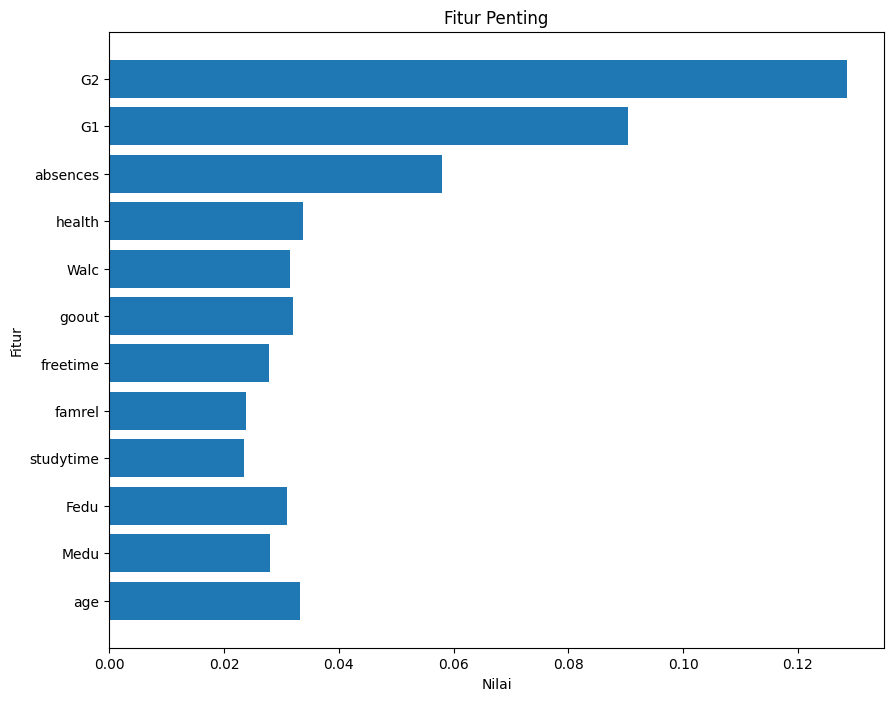

In [ ]:
import matplotlib.pyplot as plt

X = df.drop('G3', axis=1)
y = df['G3']

rfc = RandomForestClassifier()
rfc.fit(X, y)

importances = rfc.feature_importances_
important_cols = X.columns[importances > 0.02]
important_scores = importances[importances > 0.02]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(important_cols, important_scores)
ax.set_xlabel('Nilai')
ax.set_ylabel('Fitur')
ax.set_title('Fitur Penting')
plt.show()

In [ ]:
important_cols = list(important_cols) + ['G3']
new_df = pd.DataFrame(df[important_cols])

In [ ]:
new_df.to_csv('preprocessed.csv', index=False)

In [ ]:
new_df.head()

,age,Medu,Fedu,studytime,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,2,4,3,4,1,3,6,5,6,6
1,17,1,1,2,5,3,3,1,3,4,5,5,6
3,15,4,2,3,3,2,2,1,5,2,15,14,15
4,16,3,3,2,4,3,2,2,5,4,6,10,10
5,16,4,3,2,5,4,2,2,5,10,15,15,15


In [ ]:
new_df.isna().sum()

age          0
Medu         0
Fedu         0
studytime    0
famrel       0
freetime     0
goout        0
Walc         0
health       0
absences     0
G1           0
G2           0
G3           0
dtype: int64

In [ ]:
new_df.shape

(355, 13)

In [ ]:
new_df.isnull().values.any()

False

## Model Gradient Boosting Regression

### Import Library

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

### Split dataset

In [ ]:
array = new_df.values
X = array[:, 0:12] #data
y = array[:, 12] #label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [ ]:
X

array([[18,  4,  4, ...,  6,  5,  6],
       [17,  1,  1, ...,  4,  5,  5],
       [15,  4,  2, ...,  2, 15, 14],
       ...,
       [17,  3,  1, ...,  3, 14, 16],
       [18,  3,  2, ...,  0, 11, 12],
       [19,  1,  1, ...,  5,  8,  9]])

In [ ]:
y

array([ 6,  6, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14, 10,
       10, 15, 15, 16, 12,  8, 11, 15, 11, 12, 17, 16, 12, 15,  6, 18, 15,
       11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13, 13, 10, 11, 13,
       10, 15, 15,  9, 16, 11,  9,  9, 10, 15,  6,  8, 16, 15, 10,  5, 14,
       10, 10, 11,  5, 12, 11,  6, 15, 10,  8,  6, 14, 10,  7,  8, 18,  6,
       10, 14, 10, 15, 10, 14,  8, 17, 14,  6, 18, 11,  8, 18, 16, 19, 10,
       13, 19,  9, 16, 14, 13,  8, 13, 15, 15, 13, 13,  8, 12, 11,  0, 18,
        0,  0, 12, 11,  0,  0,  0, 12, 15,  0,  9, 11, 13, 11, 11,  0, 14,
       10, 12,  8, 13, 15, 12,  0,  7,  0, 10, 12, 10, 16,  0, 14,  0, 16,
       10,  9,  9, 11,  6,  9, 11,  8, 12, 17, 11, 11, 15,  9, 10, 13,  9,
        8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6, 11,  9, 10,  7,  8,
       13, 14,  8, 10, 15,  4,  8,  8, 10,  6,  0, 17, 14,  7, 15, 12, 12,
       14, 11,  9, 13,  6, 10, 12, 11,  0, 12, 12,  0, 12,  0, 18, 13,  5,
       15,  8, 10,  8,  8

### Gradient Boosting Regression

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators, max_depth, learning_rate):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []
        self.baseline = None

    def fit(self, X, y):
        self.baseline = np.mean(y)
        f = np.full(len(y), self.baseline)

        for i in range(self.n_estimators):
            residuals = y - f
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            f += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        predictions += self.baseline
        return predictions

def k_fold_cross_validation(X, y, k, n_estimators, max_depth, learning_rate):
    kf = KFold(n_splits=k)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        mse_scores.append(mse)

    return mse_scores


# Grid search for finding the best parameters
n_estimators_list = [50, 100, 150]
max_depth_list = [3, 4, 5]
learning_rate_list = [0.01, 0.1, 1.0]

best_params = None
best_mse = float('inf')

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for learning_rate in learning_rate_list:
            mse_scores = k_fold_cross_validation(X, y, k=5, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
            mean_mse = np.mean(mse_scores)

            if mean_mse < best_mse:
                best_mse = mean_mse
                best_params = (n_estimators, max_depth, learning_rate)

print("Best parameters: n_estimators={}, max_depth={}, learning_rate={}".format(*best_params))
print("Best MSE:", best_mse)

Best parameters: n_estimators=50, max_depth=4, learning_rate=0.1
Best MSE: 3.219000078363508


### Training

In [ ]:
model = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

In [ ]:
model_best = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=0.1)
model_best.fit(X_train, y_train)

### Testing

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_best = model_best.predict(X_test)

In [ ]:
y_test

array([10, 11,  8,  4, 16, 10, 10, 15,  8, 13, 13, 12, 15, 14,  0, 14, 15,
       10, 11, 13,  0, 10, 14, 18,  0,  0, 15, 16, 15, 16, 11, 14, 14, 18,
        6, 15, 10, 13, 11,  0, 10, 14, 13, 15, 10, 15, 15, 14, 11,  9, 17,
       11, 10,  9, 10, 12, 11, 14, 17, 10, 13, 14,  8,  9,  5, 10, 10, 11,
       13, 16,  9])

In [ ]:
y_pred

array([10.08569392, 10.62029236,  6.67281909,  6.46260236, 15.08122416,
       10.18447854,  7.37813326, 14.14284567,  7.56321679, 13.20823041,
       12.85667109, 11.24109588, 14.98157311, 14.21144543,  3.27470594,
       14.01988184, 14.40755691,  9.30636349, 11.17712456, 14.69235698,
       -0.3159734 ,  9.15581788, 14.12872028, 17.26327906,  3.44927837,
        1.3118099 , 15.11067599, 15.58259388, 14.98956366, 15.47926858,
       10.72151608, 12.29966571, 13.34199945, 18.77102298,  5.6529095 ,
       14.83489025,  9.79172692, 13.12202363, 10.36040296, -0.27918537,
        9.47150204, 14.15376174, 14.63691495, 16.05218436,  9.54760919,
       14.90836516, 14.31338281, 13.13295121, 10.24753891,  3.64427296,
       17.63371339, 11.02405235,  7.61567247, 11.08167707,  9.1274115 ,
       13.15147546, 11.69746612, 12.87484386, 16.12263476,  9.91496736,
       11.96168293, 12.23412757,  9.21718116,  9.36346746,  5.6837258 ,
        9.45353984,  8.37491527, 10.47845324, 14.14555096, 14.85

In [ ]:
y_pred_best

array([10.08569392, 10.62029236,  6.67281909,  6.46260236, 15.08122416,
       10.18447854,  7.37813326, 14.14284567,  7.56321679, 13.20823041,
       12.85667109, 11.24109588, 14.98157311, 14.21144543,  3.27470594,
       14.01988184, 14.40755691,  9.30636349, 11.17712456, 14.69235698,
       -0.3159734 ,  9.15581788, 14.12872028, 17.26327906,  3.44927837,
        1.3118099 , 15.11067599, 15.58259388, 14.98956366, 15.47926858,
       10.72151608, 12.29966571, 13.34199945, 18.77102298,  5.60397125,
       14.83489025,  9.79172692, 13.12202363, 10.36040296, -0.27918537,
        9.47150204, 14.15376174, 14.63691495, 16.05218436,  9.54760919,
       14.90836516, 14.31338281, 13.13295121, 10.24753891,  3.64427296,
       17.63371339, 11.02405235,  7.61567247, 11.08167707,  9.1274115 ,
       13.15147546, 11.69746612, 12.87484386, 16.12263476,  9.91496736,
       11.96168293, 12.23412757,  9.21718116,  9.36346746,  5.6837258 ,
        9.45353984,  8.37491527, 10.47845324, 14.14555096, 14.85

In [ ]:
for indeks in range(len(y_test)):
  print("Nilai Uji",indeks+1,":", y_test[indeks],", Hasil prediksi:", y_pred[indeks])

Nilai Uji 1 : 10 , Hasil prediksi: 10.085693915579064
Nilai Uji 2 : 11 , Hasil prediksi: 10.620292357859322
Nilai Uji 3 : 8 , Hasil prediksi: 6.67281908549467
Nilai Uji 4 : 4 , Hasil prediksi: 6.4626023605631415
Nilai Uji 5 : 16 , Hasil prediksi: 15.08122415747916
Nilai Uji 6 : 10 , Hasil prediksi: 10.184478543330798
Nilai Uji 7 : 10 , Hasil prediksi: 7.378133259005626
Nilai Uji 8 : 15 , Hasil prediksi: 14.142845667504467
Nilai Uji 9 : 8 , Hasil prediksi: 7.5632167905614
Nilai Uji 10 : 13 , Hasil prediksi: 13.208230408006298
Nilai Uji 11 : 13 , Hasil prediksi: 12.85667108847273
Nilai Uji 12 : 12 , Hasil prediksi: 11.241095879973045
Nilai Uji 13 : 15 , Hasil prediksi: 14.981573110349796
Nilai Uji 14 : 14 , Hasil prediksi: 14.211445433276337
Nilai Uji 15 : 0 , Hasil prediksi: 3.274705944516877
Nilai Uji 16 : 14 , Hasil prediksi: 14.019881836961655
Nilai Uji 17 : 15 , Hasil prediksi: 14.407556906366146
Nilai Uji 18 : 10 , Hasil prediksi: 9.306363487316736
Nilai Uji 19 : 11 , Hasil prediks

In [ ]:
for indeks in range(len(y_test)):
  print("Nilai Uji",indeks+1,":", y_test[indeks],", Hasil prediksi:", y_pred_best[indeks])

Nilai Uji 1 : 10 , Hasil prediksi: 10.085693915579062
Nilai Uji 2 : 11 , Hasil prediksi: 10.620292357859322
Nilai Uji 3 : 8 , Hasil prediksi: 6.672819085494673
Nilai Uji 4 : 4 , Hasil prediksi: 6.462602360563143
Nilai Uji 5 : 16 , Hasil prediksi: 15.08122415747916
Nilai Uji 6 : 10 , Hasil prediksi: 10.184478543330798
Nilai Uji 7 : 10 , Hasil prediksi: 7.378133259005626
Nilai Uji 8 : 15 , Hasil prediksi: 14.142845667504467
Nilai Uji 9 : 8 , Hasil prediksi: 7.5632167905614
Nilai Uji 10 : 13 , Hasil prediksi: 13.2082304080063
Nilai Uji 11 : 13 , Hasil prediksi: 12.85667108847273
Nilai Uji 12 : 12 , Hasil prediksi: 11.241095879973045
Nilai Uji 13 : 15 , Hasil prediksi: 14.981573110349796
Nilai Uji 14 : 14 , Hasil prediksi: 14.211445433276337
Nilai Uji 15 : 0 , Hasil prediksi: 3.274705944516877
Nilai Uji 16 : 14 , Hasil prediksi: 14.019881836961655
Nilai Uji 17 : 15 , Hasil prediksi: 14.407556906366146
Nilai Uji 18 : 10 , Hasil prediksi: 9.306363487316736
Nilai Uji 19 : 11 , Hasil prediksi:

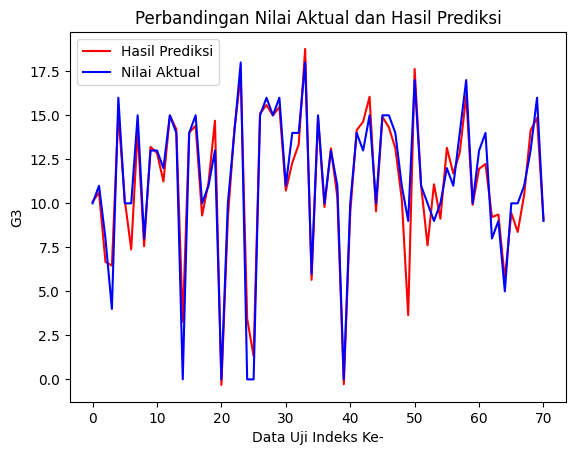

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_pred, 'r-', label='Hasil Prediksi')
plt.plot(y_test, 'b-', label='Nilai Aktual')

plt.xlabel('Data Uji Indeks Ke-')
plt.ylabel('G3')
plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi')
plt.legend()

plt.show()

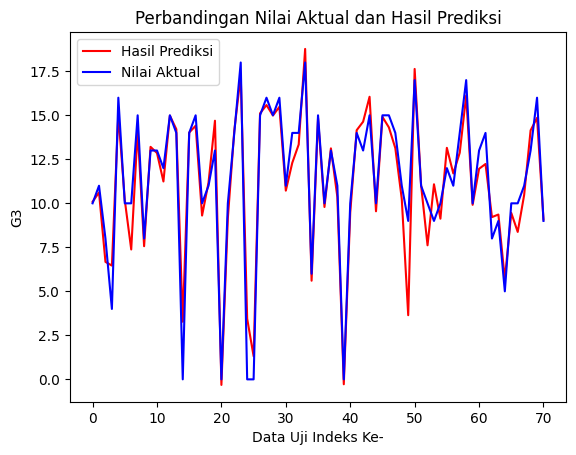

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_pred_best, 'r-', label='Hasil Prediksi')
plt.plot(y_test, 'b-', label='Nilai Aktual')

plt.xlabel('Data Uji Indeks Ke-')
plt.ylabel('G3')
plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi')
plt.legend()

plt.show()

### Evaluasi

#### Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1.6036183330642322


In [ ]:
mse = mean_squared_error(y_test, y_pred_best)
print("MSE:", mse)

MSE: 1.6041305437026676


In [ ]:
k = 5  #
n_estimators = 100
max_depth = 3
learning_rate = 0.1

mse_scores = k_fold_cross_validation(X, y, k, n_estimators, max_depth, learning_rate)

print("Mean Squared Error (MSE) scores for each fold:")
for i, mse in enumerate(mse_scores):
    print("Fold", i+1, ":", mse)

print("Average MSE GBR:", np.mean(mse_scores))

Mean Squared Error (MSE) scores for each fold:
Fold 1 : 3.1958953225784703
Fold 2 : 3.899635435567506
Fold 3 : 2.5160413129257675
Fold 4 : 3.0976926273938723
Fold 5 : 3.5884709303896405
Average MSE GBR: 3.2595471257710513


#### Mean Absolute Percentage Error (MAPE)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mape = (mae / np.mean(y_test)) * 100

print(f"MAPE: {mape}%")

MAPE: 7.685885793146953%


In [ ]:
mae = mean_absolute_error(y_test, y_pred_best)
mape = (mae / np.mean(y_test)) * 100

print(f"MAPE: {mape}%")

MAPE: 7.691980220197661%


## Model Regresi Linear

### Regresi Linear

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape


        self.weights = np.zeros(num_features)
        self.bias = 0


        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def k_fold_cross_validation_linear(X, y, k):
    kf = KFold(n_splits=k)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model_regresi = LinearRegression(learning_rate=0.001, iterations=1000)
        model_regresi.fit(X_train, y_train)
        prediksi = model_regresi.predict(X_test)

        mse = mean_squared_error(y_test, prediksi)
        mse_scores.append(mse)

    return mse_scores, prediksi

### Training

In [ ]:
model_regresi = LinearRegression(learning_rate=0.001, iterations=1000)
model_regresi.fit(X_train, y_train)
prediksi = model_regresi.predict(X_test)

In [ ]:
prediksi

array([10.49741023,  9.41321687,  7.70009843,  6.25148861, 15.42006805,
        9.92814099,  9.10697742, 15.17735999,  7.12894669, 14.80014183,
       12.81217157, 12.46083963, 14.2399453 , 13.98204993,  7.78187756,
       14.33729517, 14.45374224,  7.9477487 , 11.33172682, 13.85872785,
        2.41352759,  9.45970995, 13.74147883, 17.11986514,  6.325595  ,
        0.52863684, 16.19319691, 15.79580556, 14.65552999, 15.29759115,
        9.89964162, 11.89569649, 12.83984464, 18.14124844,  3.83404112,
       14.84555143,  8.97727061, 12.66587329, 10.50945787, -1.20521268,
        8.30866663, 13.71287632, 15.18943927, 16.41964496, 10.09783081,
       13.73789002, 14.47092425, 12.58077893, 10.18214185,  6.68785669,
       17.05619995, 10.75985702,  9.17316514, 10.49375432,  7.63322899,
       12.49674787, 11.39269557, 12.14771704, 16.63944923,  9.51491284,
       12.54613836, 11.92180348,  7.58677769,  9.64477593,  4.85505491,
        9.2625107 ,  9.43630064,  9.82371354, 13.5901586 , 14.86

In [ ]:
k = 5
mse_scores, predict = k_fold_cross_validation_linear(X, y, k)

In [ ]:
predict

array([ 9.50817485, 10.4105755 , 10.42466745, 14.58725334,  9.27608389,
       10.26798902, 13.2194714 , 14.50966448, 10.93370929, 14.90566371,
        9.03077606, 14.03106294,  7.01678279, 13.76946133, -0.5926618 ,
        6.67274712,  7.94064363, 16.04785605, 13.50307397,  6.82044952,
       15.30718502,  9.26462509, 11.03504519,  9.05342353, 15.69594701,
        7.05942524,  9.40635548, 12.96238881, 15.78417165,  9.29300439,
       14.51001612, 12.66005275,  6.30775629,  6.88813118, 10.88753687,
        8.36821735, 12.81951092,  9.06307511, 16.27040705, 12.37048264,
       11.60063229, 10.24159085, 14.40894001, 10.23819648,  8.95564573,
       12.58318372,  5.10143406,  9.49819897, 12.34079577,  5.60053504,
       11.8000759 , 10.90317616,  4.26338285, 18.22041278, 13.83425596,
        8.28871344, 14.52164738, 10.21609731, 13.7379333 ,  5.2072351 ,
       10.3888093 ,  3.57996487,  4.94604164,  8.45094619,  4.33754746,
        3.95966961,  7.34888145,  8.54347998, 15.18363087, 11.39

### Testing

In [ ]:
for indeks in range(len(y_test)):
  print("Nilai Uji",indeks+1,":", y_test[indeks],", Hasil prediksi:", prediksi[indeks])

Nilai Uji 1 : 10 , Hasil prediksi: 10.49741023395426
Nilai Uji 2 : 11 , Hasil prediksi: 9.413216870571029
Nilai Uji 3 : 8 , Hasil prediksi: 7.700098430656082
Nilai Uji 4 : 4 , Hasil prediksi: 6.251488612621343
Nilai Uji 5 : 16 , Hasil prediksi: 15.420068054747082
Nilai Uji 6 : 10 , Hasil prediksi: 9.928140990672889
Nilai Uji 7 : 10 , Hasil prediksi: 9.106977420353903
Nilai Uji 8 : 15 , Hasil prediksi: 15.17735999222655
Nilai Uji 9 : 8 , Hasil prediksi: 7.128946694128681
Nilai Uji 10 : 13 , Hasil prediksi: 14.800141825648325
Nilai Uji 11 : 13 , Hasil prediksi: 12.812171571432183
Nilai Uji 12 : 12 , Hasil prediksi: 12.460839633304216
Nilai Uji 13 : 15 , Hasil prediksi: 14.239945301076448
Nilai Uji 14 : 14 , Hasil prediksi: 13.982049927394314
Nilai Uji 15 : 0 , Hasil prediksi: 7.7818775644103155
Nilai Uji 16 : 14 , Hasil prediksi: 14.337295168667676
Nilai Uji 17 : 15 , Hasil prediksi: 14.45374223972386
Nilai Uji 18 : 10 , Hasil prediksi: 7.94774869549979
Nilai Uji 19 : 11 , Hasil prediksi

In [ ]:
for indeks in range(len(y_test)):
  print("Nilai Uji",indeks+1,":", y_test[indeks],", Hasil prediksi:", predict[indeks])

Nilai Uji 1 : 10 , Hasil prediksi: 9.50817485482551
Nilai Uji 2 : 11 , Hasil prediksi: 10.410575499592461
Nilai Uji 3 : 8 , Hasil prediksi: 10.42466745017204
Nilai Uji 4 : 4 , Hasil prediksi: 14.587253337597337
Nilai Uji 5 : 16 , Hasil prediksi: 9.276083893328233
Nilai Uji 6 : 10 , Hasil prediksi: 10.267989015281689
Nilai Uji 7 : 10 , Hasil prediksi: 13.219471402094259
Nilai Uji 8 : 15 , Hasil prediksi: 14.509664484437646
Nilai Uji 9 : 8 , Hasil prediksi: 10.933709288885131
Nilai Uji 10 : 13 , Hasil prediksi: 14.905663707101452
Nilai Uji 11 : 13 , Hasil prediksi: 9.03077605554706
Nilai Uji 12 : 12 , Hasil prediksi: 14.031062940358934
Nilai Uji 13 : 15 , Hasil prediksi: 7.016782791301315
Nilai Uji 14 : 14 , Hasil prediksi: 13.769461328844598
Nilai Uji 15 : 0 , Hasil prediksi: -0.592661797305035
Nilai Uji 16 : 14 , Hasil prediksi: 6.672747120293744
Nilai Uji 17 : 15 , Hasil prediksi: 7.940643628490617
Nilai Uji 18 : 10 , Hasil prediksi: 16.047856047786762
Nilai Uji 19 : 11 , Hasil predik

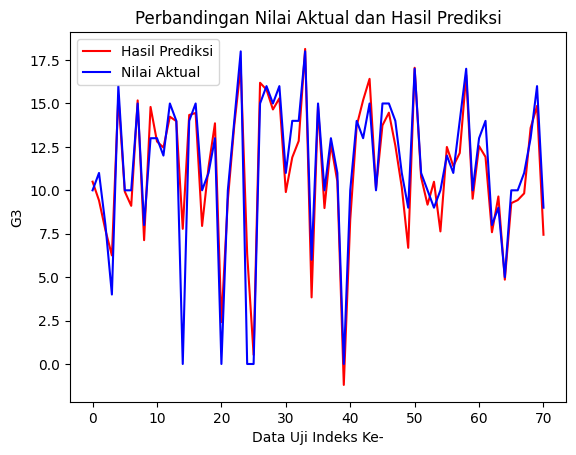

In [ ]:
import matplotlib.pyplot as plt

plt.plot(prediksi, 'r-', label='Hasil Prediksi')
plt.plot(y_test, 'b-', label='Nilai Aktual')

plt.xlabel('Data Uji Indeks Ke-')
plt.ylabel('G3')
plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi')
plt.legend()

plt.show()

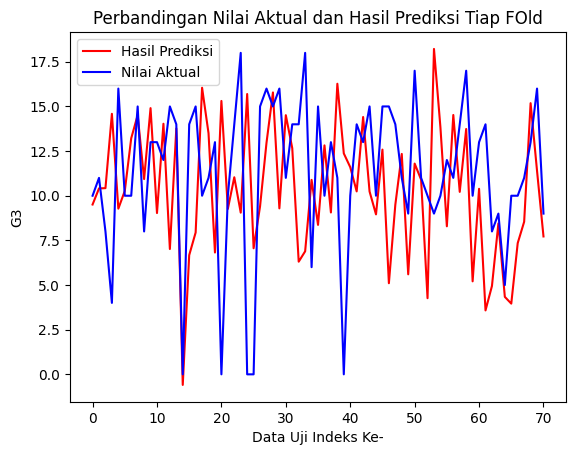

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predict, 'r-', label='Hasil Prediksi')
plt.plot(y_test, 'b-', label='Nilai Aktual')

plt.xlabel('Data Uji Indeks Ke-')
plt.ylabel('G3')
plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi Tiap FOld')
plt.legend()

plt.show()

### Evaluasi

#### Mean Squared Error (MSE)

In [ ]:
mse_regresi = mean_squared_error(y_test, prediksi)
print("MSE:", mse_regresi)

MSE: 2.644239010913163


In [ ]:
print("Mean Squared Error (MSE) scores for each fold:")
for i, mse in enumerate(mse_scores):
    print("Fold", i+1, ":", mse)

print("Average MSE MLR:", np.mean(mse_scores))

Mean Squared Error (MSE) scores for each fold:
Fold 1 : 1.5795045818168159
Fold 2 : 2.1642492916572964
Fold 3 : 3.1778567821594748
Fold 4 : 5.147815070271347
Fold 5 : 5.649540546486897
Average MSE MLR: 3.5437932544783664


#### Mean Absolute Percentage Error (MAPE)

In [ ]:
mae = mean_absolute_error(y_test, prediksi)
mape = (mae / np.mean(y_test)) * 100

print(f"MAPE: {mape}%")

MAPE: 9.431107742474328%


In [ ]:
mae = mean_absolute_error(y_test, predict)
mape = (mae / np.mean(y_test)) * 100

print(f"MAPE: {mape}%")

MAPE: 39.074678952423234%
